In [48]:
import importlib
import Policy 
import Environment
import Diadic

from tqdm.auto import tqdm

importlib.reload(Policy)
importlib.reload(Environment)
importlib.reload(Diadic)

import matplotlib.pyplot as plt
import numpy as np

In [40]:
class Simulator:
    def __init__(self, algos, env, T):
        """
        algos: dict {name: algo_instance}
        """
        self.algos = algos  # dictionary of algorithms
        self.env = env
        self.T = T
        self.regrets = {name: [] for name in algos}  # track regrets for each algorithm

    def run(self):
        for t in tqdm(range(self.T)):
            for name, algo in self.algos.items():
                x_t = algo.choose_action()
                y_t = self.env.get_reward(t, x_t)
                algo.update(x_t, y_t)
                self.update_regret(name, t, x_t)

    def update_regret(self, name, t, x_t):
        best_mean_value_t = 1  # true best arm mean at time t (depends on env)
        r_t = best_mean_value_t - self.env.get_reward(t, x_t)
        self.regrets[name].append(r_t)

    def plot_regrets(self):
            plt.figure(figsize=(10, 6))
            for name, r_list in self.regrets.items():
                cumulative_regret = np.cumsum(r_list)
                plt.plot(cumulative_regret, label=name)

            plt.title("Cumulative Regret Comparison")
            plt.xlabel("Time")
            plt.ylabel("Cumulative Regret")
            plt.legend()
            plt.tight_layout()
            plt.show()


In [41]:
nb_shifts = 2
phase_length = 3000
T = nb_shifts*phase_length
env = Environment.Environment(T, nb_shifts)

Entering Episode 1
Entering Block 3


/Users/nicolasnguyen/Documents/Projets/Non-Stationary Lipschitz Bandits/NS_Lipschitz_Bandits/Policy.py:262: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


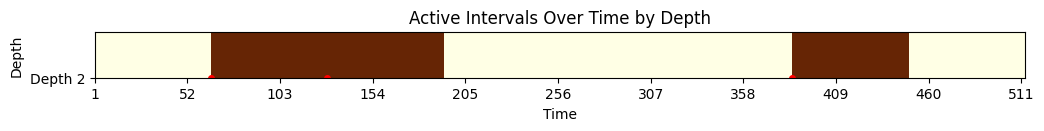

K optimal =  8


In [44]:
algo_MBDE = Policy.MBDE(T, c0=3.2)
algo_BinningUCB = Policy.BinningUCB(T)
algo_BinningUCB_Oracle = Policy.BinningUCB_Oracle(T, nb_shifts)

  8%|▊         | 488/6000 [00:01<00:15, 352.19it/s] 

Entering Block 4


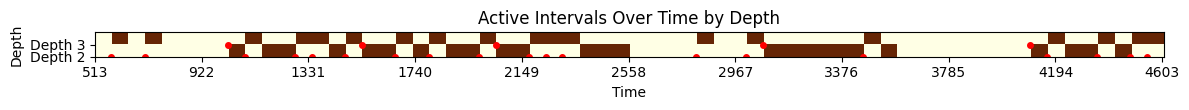

 16%|█▌        | 965/6000 [00:05<00:57, 87.24it/s] 

evicted with interval [944, 947]
Node (4, 4) evicted at t=947 (Replay(4))
evicted with interval [944, 947]
Node (4, 3) evicted at t=947 (Replay(4))
evicted with interval [944, 947]
Node (4, 6) evicted at t=947 (Replay(4))
evicted with interval [944, 947]
Node (4, 2) evicted at t=947 (Replay(4))
evicted with interval [944, 947]
Node (4, 5) evicted at t=947 (Replay(4))
evicted with interval [944, 947]
Node (4, 8) evicted at t=947 (Replay(4))
evicted with interval [944, 947]
Node (4, 7) evicted at t=947 (Replay(4))


 21%|██        | 1263/6000 [00:11<00:27, 173.88it/s]

evicted with interval [1201, 1206]
Node (4, 2) evicted at t=1206 (Replay(2))
evicted with interval [1201, 1206]
Node (4, 3) evicted at t=1206 (Replay(2))
evicted with interval [1201, 1206]
Node (4, 4) evicted at t=1206 (Replay(2))
evicted with interval [1201, 1206]
Node (4, 5) evicted at t=1206 (Replay(2))
evicted with interval [1201, 1206]
Node (4, 6) evicted at t=1206 (Replay(2))
evicted with interval [1201, 1206]
Node (4, 7) evicted at t=1206 (Replay(2))
evicted with interval [1201, 1206]
Node (4, 8) evicted at t=1206 (Replay(2))


 24%|██▍       | 1437/6000 [00:16<00:44, 103.02it/s]

evicted with interval [1400, 1403]
Node (4, 2) evicted at t=1403 (Replay(3))
evicted with interval [1400, 1403]
Node (4, 3) evicted at t=1403 (Replay(3))
evicted with interval [1400, 1403]
Node (4, 4) evicted at t=1403 (Replay(3))
evicted with interval [1400, 1403]
Node (4, 5) evicted at t=1403 (Replay(3))
evicted with interval [1400, 1403]
Node (4, 6) evicted at t=1403 (Replay(3))
evicted with interval [1400, 1403]
Node (4, 7) evicted at t=1403 (Replay(3))
evicted with interval [1400, 1403]
Node (4, 8) evicted at t=1403 (Replay(3))


 30%|██▉       | 1792/6000 [00:28<00:26, 158.01it/s]

evicted with interval [1725, 1728]
Node (4, 2) evicted at t=1728 (Replay(2))
evicted with interval [1725, 1728]
Node (4, 3) evicted at t=1728 (Replay(2))
evicted with interval [1725, 1728]
Node (4, 4) evicted at t=1728 (Replay(2))
evicted with interval [1725, 1728]
Node (4, 5) evicted at t=1728 (Replay(2))
evicted with interval [1725, 1728]
Node (4, 6) evicted at t=1728 (Replay(2))
evicted with interval [1725, 1728]
Node (4, 7) evicted at t=1728 (Replay(2))
evicted with interval [1725, 1728]
Node (4, 8) evicted at t=1728 (Replay(2))


 38%|███▊      | 2305/6000 [00:45<00:06, 545.74it/s]

evicted with interval [1590, 2324]
Node (4, 4) evicted at t=2324 (Replay(2))


 42%|████▏     | 2497/6000 [00:49<00:33, 105.13it/s]

evicted with interval [513, 2496]
Node (4, 4) evicted at t=2496 (Replay(2))
evicted with interval [1190, 2496]
Node (4, 5) evicted at t=2496 (Replay(2))
evicted with interval [1383, 2496]
Node (4, 6) evicted at t=2496 (Replay(2))
evicted with interval [1073, 2496]
Node (4, 7) evicted at t=2496 (Replay(2))


 42%|████▏     | 2547/6000 [00:50<00:39, 86.92it/s] 

evicted with interval [513, 2560]
Node (4, 4) evicted at t=2560 (Replay(3))
evicted with interval [1389, 2560]
Node (4, 6) evicted at t=2560 (Replay(3))
evicted with interval [1137, 2560]
Node (4, 7) evicted at t=2560 (Replay(3))


 49%|████▉     | 2945/6000 [01:04<02:24, 21.20it/s]

evicted with interval [513, 2944]
Node (4, 4) evicted at t=2944 (Replay(2))
evicted with interval [513, 2944]
Node (4, 6) evicted at t=2944 (Replay(2))
evicted with interval [513, 2944]
Node (4, 7) evicted at t=2944 (Replay(2))


 60%|█████▉    | 3584/6000 [01:10<00:02, 998.96it/s]

evicted with interval [513, 3584]
Node (4, 4) evicted at t=3584 (Replay(3))
evicted with interval [513, 3584]
Node (4, 6) evicted at t=3584 (Replay(3))
evicted with interval [513, 3584]
Node (4, 7) evicted at t=3584 (Replay(3))
evicted with interval [513, 3648]
Node (4, 4) evicted at t=3648 (Replay(2))
evicted with interval [513, 3648]
Node (4, 6) evicted at t=3648 (Replay(2))
evicted with interval [513, 3648]
Node (4, 7) evicted at t=3648 (Replay(2))


 64%|██████▍   | 3833/6000 [01:26<01:16, 28.43it/s] 

evicted with interval [513, 3840]
Node (4, 4) evicted at t=3840 (Replay(2))
evicted with interval [513, 3840]
Node (4, 6) evicted at t=3840 (Replay(2))
evicted with interval [513, 3840]
Node (4, 7) evicted at t=3840 (Replay(2))


 66%|██████▌   | 3968/6000 [01:35<02:01, 16.73it/s]

evicted with interval [513, 3968]
Node (4, 4) evicted at t=3968 (Replay(2))
evicted with interval [513, 3968]
Node (4, 6) evicted at t=3968 (Replay(2))
evicted with interval [513, 3968]
Node (4, 7) evicted at t=3968 (Replay(2))


 67%|██████▋   | 4031/6000 [01:40<02:17, 14.31it/s]

evicted with interval [513, 4032]
Node (4, 4) evicted at t=4032 (Replay(2))
evicted with interval [513, 4032]
Node (4, 6) evicted at t=4032 (Replay(2))
evicted with interval [513, 4032]
Node (4, 7) evicted at t=4032 (Replay(2))
evicted with interval [3585, 4032]
Node (4, 4) evicted at t=4032 (Replay(2))
evicted with interval [3583, 4032]
Node (4, 6) evicted at t=4032 (Replay(2))
evicted with interval [3583, 4032]
Node (4, 7) evicted at t=4032 (Replay(2))


 77%|███████▋  | 4607/6000 [02:25<00:43, 31.72it/s]


RuntimeError: dictionary changed size during iteration

In [45]:
sim = Simulator(
    algos={
        "BinningUCB": algo_BinningUCB,
        "BinningUCB (Oracle)": algo_BinningUCB_Oracle,
        "MBDE": algo_MBDE,
    },
    env=env,
    T=T
)

sim.run()

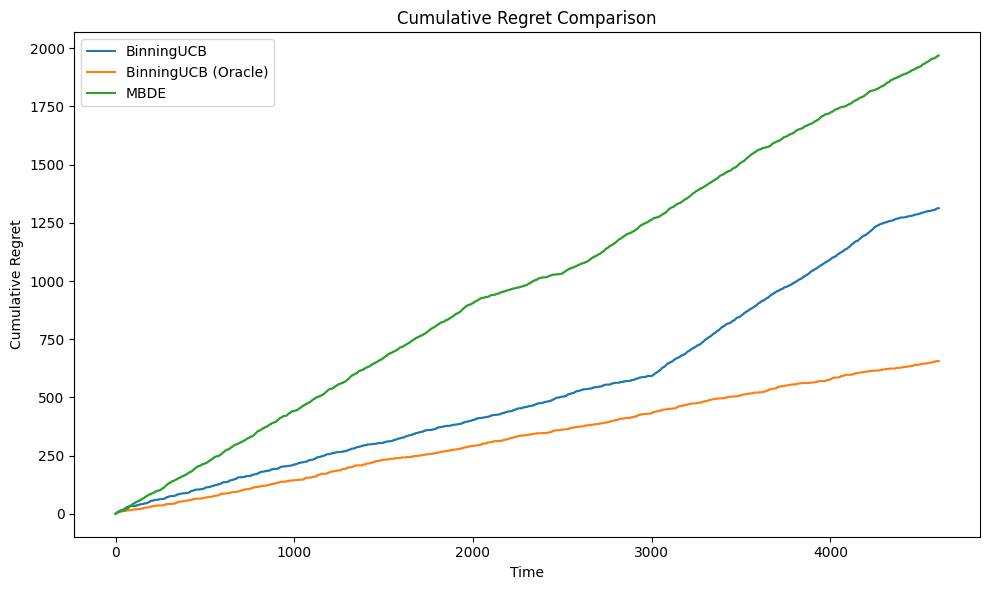

In [46]:
sim.plot_regrets()

In [47]:
sim.algos['MBDE'].tree.visualize()

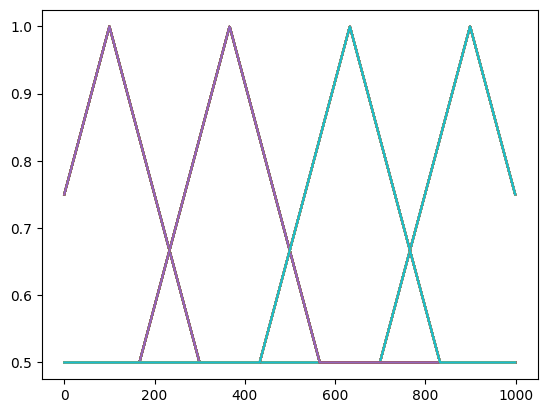

In [31]:
x_list = list(np.linspace(0, 1, 1000))
for t_test in np.linspace(1, T-1, 100) :
        
    y_list = [env.mean_reward(int(t_test), x) for x in x_list]
    plt.plot(y_list)